# Multi-Class Classification model

In [ ]:
!pip install "tensorflow==2.9.1", opencv-python, matplotlib

Name: tensorflow
Version: 2.9.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\saads\anaconda3\envs\py310\lib\site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, keras-preprocessing, libclang, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: 


## saving and loading variables

In [1]:
import joblib

def save_with_joblib(filename, obj):
    joblib.dump(obj, filename)
    print(f"{filename} saved successfully.")

def load_with_joblib(filename):
    return joblib.load(filename)

### imports

In [2]:
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.metrics import Precision, Accuracy, Recall
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras import backend as K

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [3]:
# to prevent gpu overloading
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

### preprocessing data (manually)

In [4]:
# creating list of class names
with open('data/name_of_the_animals.txt', 'r') as file:
    animals_list = [line.strip() for line in file]

animals_list

['antelope',
 'badger',
 'bat',
 'bear',
 'bee',
 'beetle',
 'bison',
 'boar',
 'butterfly',
 'cat',
 'caterpillar',
 'chimpanzee',
 'cockroach',
 'cow',
 'coyote',
 'crab',
 'crow',
 'deer',
 'dog',
 'dolphin',
 'donkey',
 'dragonfly',
 'duck',
 'eagle',
 'elephant',
 'flamingo',
 'fly',
 'fox',
 'goat',
 'goldfish',
 'goose',
 'gorilla',
 'grasshopper',
 'hamster',
 'hare',
 'hedgehog',
 'hippopotamus',
 'hornbill',
 'horse',
 'hummingbird',
 'hyena',
 'jellyfish',
 'kangaroo',
 'koala',
 'ladybugs',
 'leopard',
 'lion',
 'lizard',
 'lobster',
 'mosquito',
 'moth',
 'mouse',
 'octopus',
 'okapi',
 'orangutan',
 'otter',
 'owl',
 'ox',
 'oyster',
 'panda',
 'parrot',
 'pelecaniformes',
 'penguin',
 'pig',
 'pigeon',
 'porcupine',
 'possum',
 'raccoon',
 'rat',
 'reindeer',
 'rhinoceros',
 'sandpiper',
 'seahorse',
 'seal',
 'shark',
 'sheep',
 'snake',
 'sparrow',
 'squid',
 'squirrel',
 'starfish',
 'swan',
 'tiger',
 'turkey',
 'turtle',
 'whale',
 'wolf',
 'wombat',
 'woodpecker',


In [ ]:
DATA_DIR = "data/animals/"
IMG_WIDTH = 224
IMG_HEIGHT = 224

# def preprocess_image(image_path):
#     image = cv2.imread(image_path)
#     image = cv2.resize(image, (IMG_WIDTH, IMG_HEIGHT))
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#     image = image / 255.0
#     return image

def preprocess_image(image_path):
    try: 
        image = cv2.imread(image_path)
        image = cv2.resize(image, (IMG_WIDTH, IMG_HEIGHT))
        # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = image / 255.0
    except Exception as e: 
        print('Issue with image {}'.format(image_path))
    return image


# Create dataset
data = []
labels = []

# for animal in animals_list:
#     animal_dir = os.path.join(DATA_DIR, animal')
#     for img_name in os.listdir(animal_dir):
#         img_path = os.path.join(animal_dir, img_name)
#         data.append(preprocess_image(img_path))
#         labels.append(animal)

for animal in animals_list:
    animal_dir = os.path.join(DATA_DIR, f'{animal}/')
    for img_name in os.listdir(animal_dir):
        img_path = os.path.join(animal_dir, img_name)
        print(img_path)
        data.append(preprocess_image(img_path))
        labels.append(animal)

data = np.array(data)
labels = np.array(labels)

data/animals/antelope/02f4b3be2d.jpg
data/animals/antelope/03d7fc0888.jpg
data/animals/antelope/058fa9a60f.jpg
data/animals/antelope/0a37838e99.jpg
data/animals/antelope/0b1a3af197.jpg
data/animals/antelope/0b688923b0.jpg
data/animals/antelope/0c16ef86c0.jpg
data/animals/antelope/0e17715606.jpg
data/animals/antelope/0ee903ea13.jpg
data/animals/antelope/0fb2e9aa81.jpg
data/animals/antelope/0fe7076f06.jpg
data/animals/antelope/17a07512e9.jpg
data/animals/antelope/17ddf07f85.jpg
data/animals/antelope/1a3f59ee02.jpg
data/animals/antelope/1b0b0b614b.jpg
data/animals/antelope/1d3c6105c9.jpg
data/animals/antelope/1d556456dc.jpg
data/animals/antelope/1db1ad56e5.jpg
data/animals/antelope/24b29ea96e.jpg
data/animals/antelope/26ffc1ee1f.jpg
data/animals/antelope/27a5369441.jpg
data/animals/antelope/27d251fa65.jpg
data/animals/antelope/2c11ae88c0.jpg
data/animals/antelope/2d2dd75fb8.jpg
data/animals/antelope/2efa7906c2.jpg
data/animals/antelope/34e5155c46.jpg
data/animals/antelope/37fccb303f.jpg
d

In [10]:
assert len(labels)==len(data)

In [11]:
label_encoder = LabelEncoder()
transformed_labels = label_encoder.fit_transform(labels)

In [12]:
# creating train and test sets
X_train, X_test, y_train, y_test = train_test_split(data, transformed_labels, test_size=0.2)

## setting up NN layers

In [13]:
# downloading the pre-trained model
base_model = EfficientNetB3(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))

In [14]:
# Unfreezing layers; lesser learnable parameters = more model robustness
for layer in base_model.layers[-50:]: 
    layer.trainable = True

In [15]:
# dynamic optimizing of learning rate based on observed validation loss
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=4, min_lr=1e-6)

In [16]:
# for data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Reserve 20% for validation
)

In [17]:
BATCH_SIZE = 16

# creating a validation set
train_gen = datagen.flow(X_train, y_train, shuffle=True, subset='training', batch_size=BATCH_SIZE)
val_gen = datagen.flow(X_train, y_train, shuffle=True, subset='validation', batch_size=BATCH_SIZE)

In [18]:
print('Length of train_gen: ', len(train_gen))
print('Length of val_gen', len(val_gen))

Length of train_gen:  216
Length of val_gen 54


### describing model layers

In [19]:
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(animals_list), activation='softmax')
])

In [20]:
# Compile the model with a lower learning rate
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [21]:
# saving all necessary variables
save_with_joblib("animals_list.pkl", animals_list)
save_with_joblib("X_train.pkl", X_train)
save_with_joblib("y_train.pkl", y_train)
save_with_joblib("X_test.pkl", X_test)
save_with_joblib("y_test.pkl", y_test)
save_with_joblib("label_encoder.pkl", label_encoder)

animals_list.pkl saved successfully.
X_train.pkl saved successfully.
y_train.pkl saved successfully.
X_test.pkl saved successfully.
y_test.pkl saved successfully.
label_encoder.pkl saved successfully.


In [23]:
# loading the variables
animals_list = load_with_joblib("animals_list.pkl")
X_train = load_with_joblib("X_train.pkl")
y_train = load_with_joblib("y_train.pkl")
X_test = load_with_joblib("X_test.pkl")
y_test = load_with_joblib("y_test.pkl")
label_encoder = load_with_joblib("label_encoder.pkl")

In [22]:
model.save("model.h5")

In [25]:
# load model
model = load_model("model.h5")

# training the model 

In [22]:
# Fit the model
history = model.fit(
    train_gen,  
    epochs=25, 
    validation_data=val_gen, 
    callbacks=[lr_scheduler],
    steps_per_epoch=len(train_gen),  # Number of batches per epoch for training
    validation_steps=len(val_gen)  # Number of batches per epoch for validation
)

Epoch 1/25
216/216 [==============================] - 103s 396ms/step - loss: 4.1087 - accuracy: 0.1201 - val_loss: 4.5227 - val_accuracy: 0.0220 - lr: 1.0000e-04
Epoch 2/25
216/216 [==============================] - 85s 392ms/step - loss: 2.1789 - accuracy: 0.5258 - val_loss: 4.4747 - val_accuracy: 0.0220 - lr: 1.0000e-04
Epoch 3/25
216/216 [==============================] - 85s 392ms/step - loss: 1.1401 - accuracy: 0.7147 - val_loss: 1.9040 - val_accuracy: 0.5498 - lr: 1.0000e-04
Epoch 4/25
216/216 [==============================] - 85s 393ms/step - loss: 0.7671 - accuracy: 0.8067 - val_loss: 0.7496 - val_accuracy: 0.8090 - lr: 1.0000e-04
Epoch 5/25
216/216 [==============================] - 85s 391ms/step - loss: 0.5610 - accuracy: 0.8545 - val_loss: 1.2881 - val_accuracy: 0.6609 - lr: 1.0000e-04
Epoch 6/25
216/216 [==============================] - 85s 391ms/step - loss: 0.4032 - accuracy: 0.8961 - val_loss: 1.2406 - val_accuracy: 0.7060 - lr: 1.0000e-04
Epoch 7/25
216/216 [=======

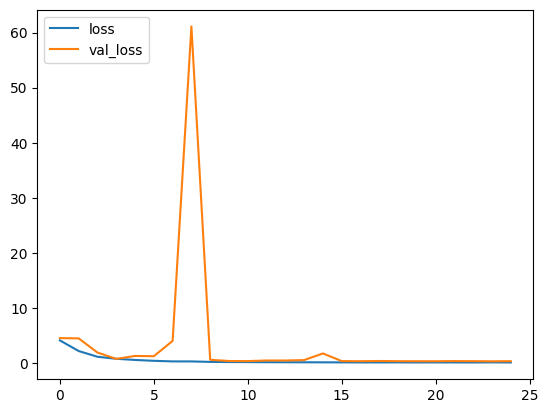

In [23]:
plt.figure()
plt.plot(history.history['loss'], label="loss")
plt.plot(history.history['val_loss'], label="val_loss")
plt.legend(loc="upper left")
plt.show()

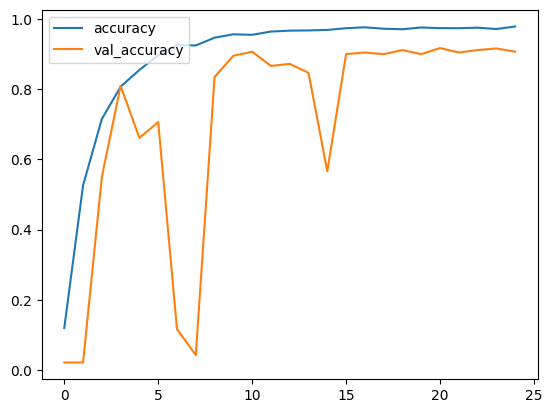

In [24]:
plt.figure()
plt.plot(history.history['accuracy'], label="accuracy")
plt.plot(history.history['val_accuracy'], label="val_accuracy")
plt.legend(loc="upper left")
plt.show()

### Saving the model

In [28]:
model.save(os.path.join('models','finetuned_classifier.h5'))

### Loading the model

In [3]:
model_v1 = load_model('models/finetuned_classifier.h5')

### Evaluating on test set

In [7]:
test_preds = model_v1.predict(X_test)

34/34 [==============================] - 12s 197ms/step


In [15]:
test_preds[0]

array([1.3892213e-05, 5.1190937e-06, 5.6382682e-06, 1.4453303e-07,
       3.9398260e-06, 1.3893439e-06, 2.0242769e-06, 9.0208675e-07,
       4.1824915e-06, 4.1341130e-07, 9.7506279e-07, 5.4912914e-07,
       4.0636007e-07, 2.7274843e-06, 9.6713438e-07, 5.5738531e-07,
       3.8570915e-06, 1.5238205e-06, 1.2182848e-06, 1.1434012e-06,
       1.9007599e-06, 8.0952577e-07, 6.0803322e-06, 2.2344426e-05,
       4.4768126e-07, 1.2387191e-06, 2.2930833e-07, 4.7184918e-07,
       1.3019034e-06, 8.0574819e-06, 7.6007200e-06, 1.8248433e-07,
       4.4958472e-07, 1.2586821e-06, 8.2527622e-06, 2.1075209e-07,
       5.3459104e-07, 2.8468363e-04, 3.1469981e-06, 8.7448134e-06,
       1.1122119e-06, 9.5432301e-07, 7.1196905e-07, 2.3597320e-06,
       7.8737658e-06, 4.5790404e-07, 1.1037157e-06, 9.5820124e-06,
       3.5365513e-06, 6.7805621e-07, 2.7284964e-06, 2.6677864e-07,
       7.2251356e-07, 1.0342293e-05, 3.2761992e-07, 1.1671748e-07,
       3.9593597e-06, 3.7624643e-06, 2.5329027e-06, 1.4036982e

In [13]:
# Convert predictions to class labels (if using softmax activation in the final layer)
predicted_labels = np.argmax(test_preds, axis=1)
predicted_labels

array([88, 42, 23, ..., 22, 57, 78], dtype=int64)

In [16]:
y_test

array([88, 42, 23, ..., 30, 57, 78], dtype=int64)

In [17]:
report = classification_report(y_test, predicted_labels, target_names=animals_list)

In [19]:
print(report)

                precision    recall  f1-score   support

      antelope       0.82      0.93      0.88        15
        badger       0.93      1.00      0.97        14
           bat       0.87      0.93      0.90        14
          bear       1.00      0.93      0.96        14
           bee       1.00      1.00      1.00         7
        beetle       1.00      1.00      1.00        11
         bison       0.92      1.00      0.96        11
          boar       1.00      0.91      0.95        11
     butterfly       0.86      1.00      0.92        12
           cat       1.00      0.90      0.95        10
   caterpillar       1.00      0.81      0.90        16
    chimpanzee       1.00      1.00      1.00         9
     cockroach       1.00      1.00      1.00        15
           cow       0.88      0.70      0.78        10
        coyote       0.88      0.88      0.88        17
          crab       0.88      0.88      0.88         8
          crow       1.00      1.00      1.00  

# testing on some images

In [8]:
IMG_HEIGHT = 224
IMG_WIDTH = 224

In [15]:
def preprocess_image(image_path):
    try: 
        image = cv2.imread(image_path)
        image = cv2.resize(image, (IMG_WIDTH, IMG_HEIGHT))
        # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = image / 255.0
        image = np.expand_dims(image, axis=0)
    except Exception as e: 
        print('Issue with image {}'.format(image_path))
    return image

In [19]:
img.shape

(1, 224, 224, 3)

In [21]:
img = preprocess_image('tiger.jpg')

np.argmax(model_v1.predict(img), axis=1)

1/1 [==============================] - 0s 60ms/step


array([82], dtype=int64)

In [24]:
animals_list[82]

'tiger'

In [ ]:
def get_top_10_predictions(image_path, model, animals_list):
    # Preprocess the image
    img = preprocess_image(image_path)

    # Get the predicted probabilities for all classes
    probabilities = model.predict(img)

    # Get the top 10 highest probabilities and their respective indices
    top_10_indices = np.argsort(probabilities[0])[::-1][:10]  # Sort probabilities in descending order

    # Get the top 10 class labels and their probabilities
    top_10_classes = [animals_list[i] for i in top_10_indices]
    top_10_probs = probabilities[0][top_10_indices]

    # Plot the top 10 predictions in a bar chart
    plt.figure(figsize=(10, 6))
    plt.barh(top_10_classes, top_10_probs, color='skyblue')
    plt.xlabel('Probability')
    plt.title('Top 10 Predictions')
    plt.gca().invert_yaxis()  # Invert the y-axis to have the highest probability at the top
    plt.show()
    
    # Return the top 10 predictions and probabilities
    return list(zip(top_10_classes, top_10_probs))

1/1 [==============================] - 0s 29ms/step


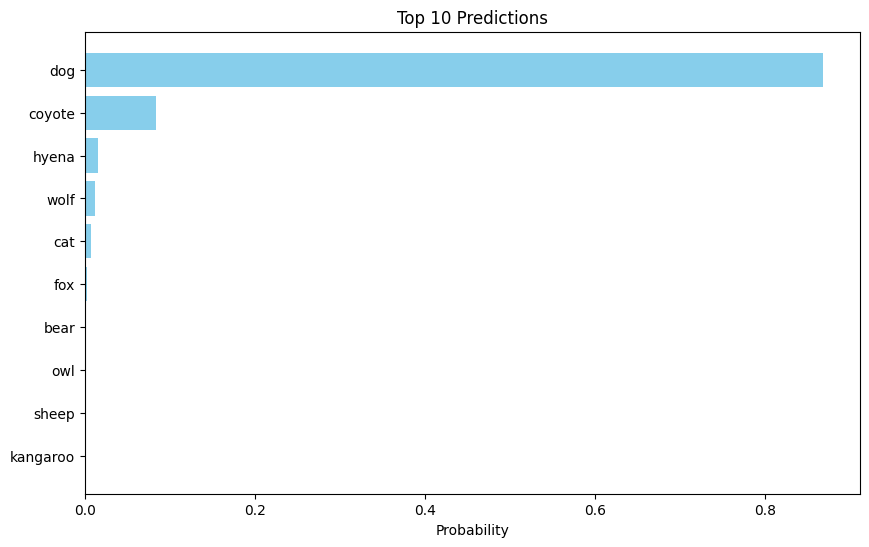

[('dog', 0.8679647),
 ('coyote', 0.08380987),
 ('hyena', 0.015182731),
 ('wolf', 0.011253017),
 ('cat', 0.0066388813),
 ('fox', 0.001832677),
 ('bear', 0.0013773376),
 ('owl', 0.0012610361),
 ('sheep', 0.000764849),
 ('kangaroo', 0.00069387857)]

In [33]:
get_top_10_predictions('cat_and_dog.jpg', model_v1, animals_list)

1/1 [==============================] - 0s 30ms/step


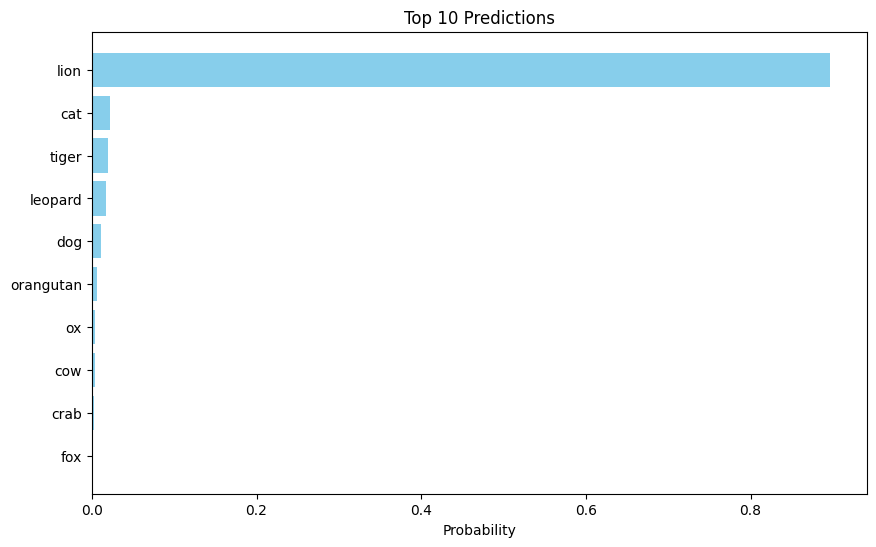

[('lion', 0.8964301),
 ('cat', 0.022201594),
 ('tiger', 0.020121008),
 ('leopard', 0.016882813),
 ('dog', 0.01073678),
 ('orangutan', 0.005782499),
 ('ox', 0.004030365),
 ('cow', 0.00374667),
 ('crab', 0.0031987317),
 ('fox', 0.001875352)]

In [34]:
get_top_10_predictions('lion-family-4.jpg', model_v1, animals_list)

1/1 [==============================] - 0s 25ms/step


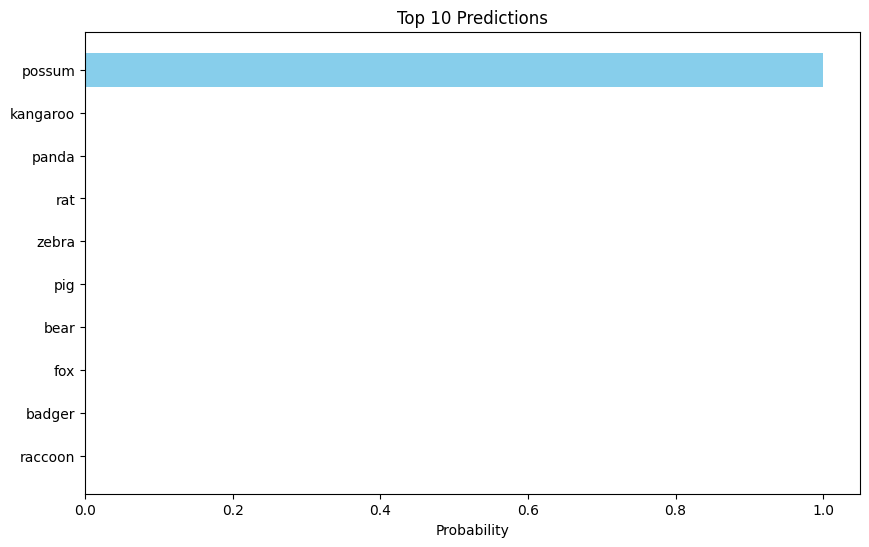

[('possum', 0.9998332),
 ('kangaroo', 4.2805685e-05),
 ('panda', 3.5081852e-05),
 ('rat', 2.5157397e-05),
 ('zebra', 1.038924e-05),
 ('pig', 5.4696984e-06),
 ('bear', 5.3713684e-06),
 ('fox', 5.0110366e-06),
 ('badger', 4.582398e-06),
 ('raccoon', 2.6884632e-06)]

In [35]:
get_top_10_predictions('mix-opp.jpg', model_v1, animals_list)